In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

In [2]:
#importing the telecom data
df = pd.read_csv("telecom_users.csv")

In [3]:
#displaying the telecom data
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
#showing info about the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [6]:
#removing unnecessary columns
df.drop(columns=["Unnamed: 0", "customerID"], inplace=True)
df.head()

KeyError: "['Unnamed: 0' 'customerID'] not found in axis"

 #### First, I want to explore some of the variables I found intriguing

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [20]:
df.shape

(5986, 20)

In [21]:
#counting the churn variable
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [23]:
#checking for duplicates
df.duplicated(subset = None, keep = 'first').sum()

16

In [24]:
#removing duplicates
df = df.drop_duplicates(keep = 'first')

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [20]:
#setting the theme for my plots
sns.set_style("whitegrid")
sns.set_palette("tab20c")

#### Using a Dashboard layout similar to tableau, I will now display some of the variables

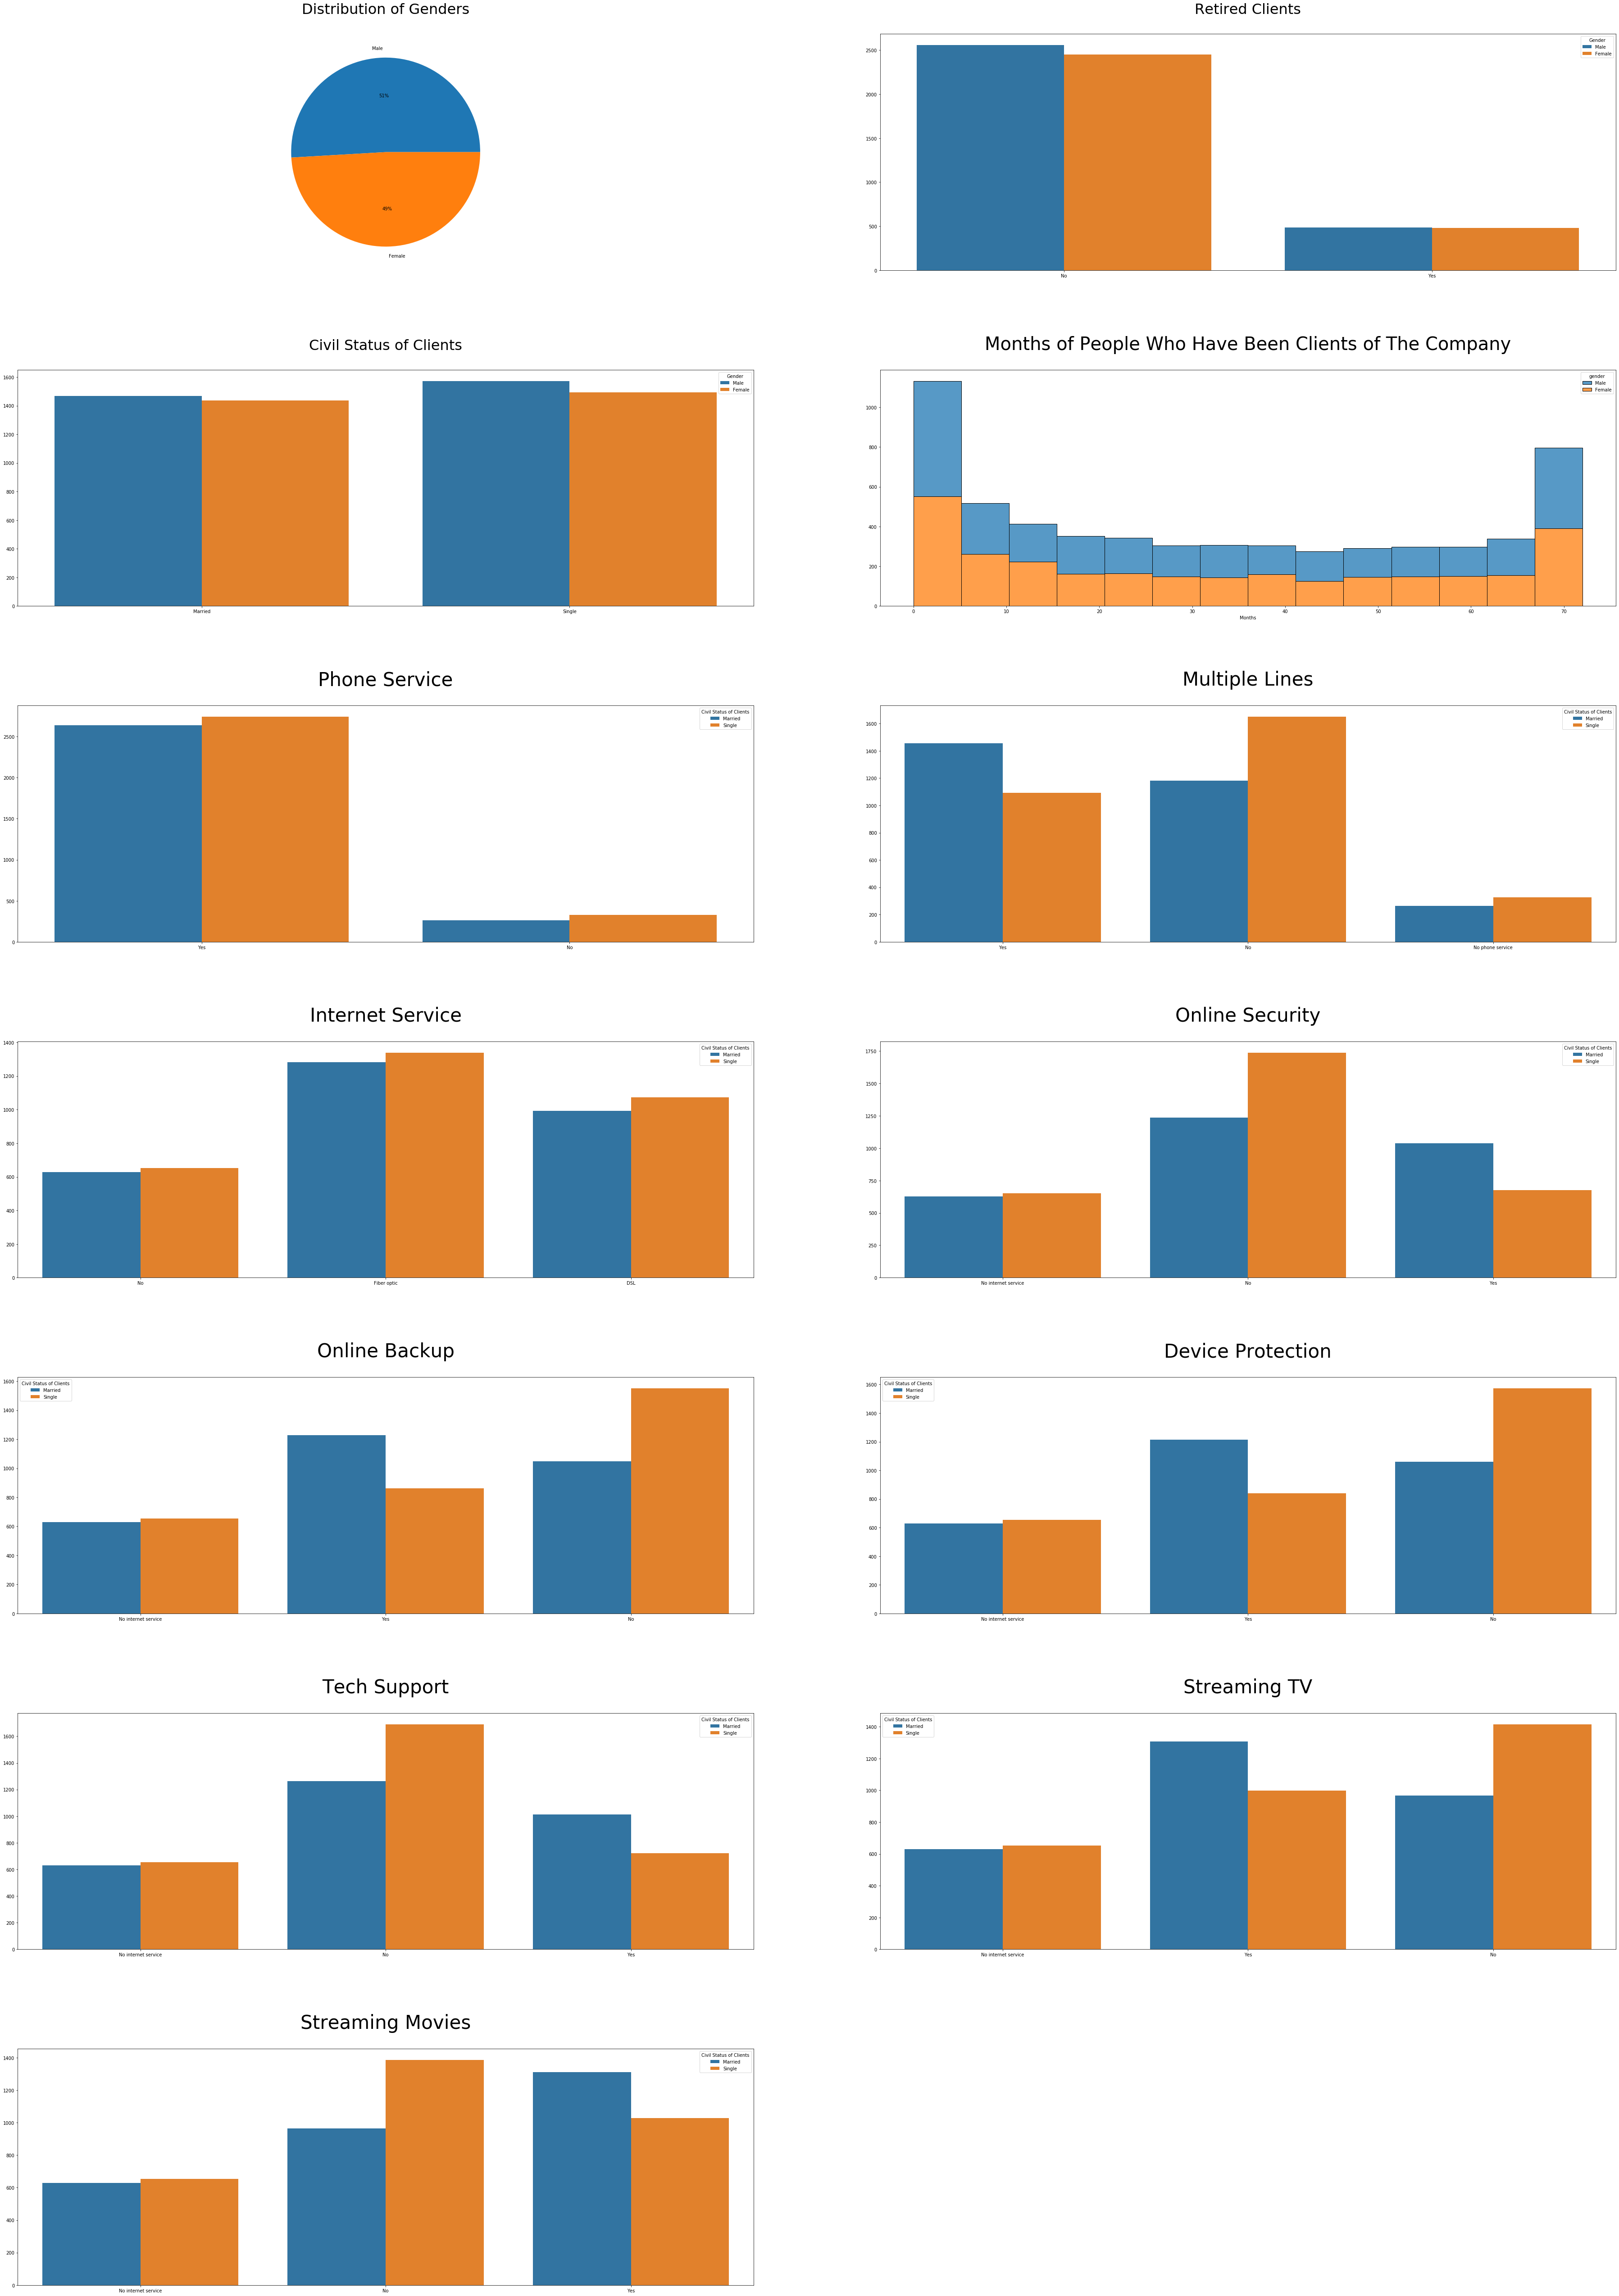

In [26]:
fig, ax=plt.subplots(nrows=7, ncols=2, figsize=(50, 70))
fig.tight_layout(h_pad=20, w_pad=25)

plt.sca(ax[0, 0])
plt.pie(x=df.gender.value_counts(), labels=df.gender.value_counts().index, autopct="%1.0f%%")
ax[0, 0].set_title("Distribution of Genders", fontsize=32, pad=45)

plt.sca(ax[0, 1])
sns.countplot(x=df.SeniorCitizen, hue=df.gender)
ax[0, 1].set_title("Retired Clients", fontsize=32, pad=45)
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title="Gender")

plt.sca(ax[1, 0])
sns.countplot(x=df.Partner, hue=df.gender)
ax[1, 0].set_title("Civil Status of Clients", fontsize=32, pad=45)
plt.xlabel("")
plt.ylabel("")
ax[1, 0].set_xticklabels(["Married", "Single"])
plt.legend(title="Gender")

plt.sca(ax[1, 1])
sns.histplot(x=df.tenure, hue=df.gender, multiple="stack")
ax[1, 1].set_title("Months of People Who Have Been Clients of The Company", fontsize=40, pad=45)
plt.xlabel("Months")
plt.ylabel("")

services=["Phone Service", "Multiple Lines", "Internet Service", "Online Security", "Online Backup",
          "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]
for x in range(len(services)):
    plt.sca(ax[2+(x//2), 0+(x%2)])
    ax[2+(x//2), 0+(x%2)].set_title(services[x], fontsize=42, pad=45)
    sns.countplot(x=df[services[x].replace(" ","")], hue=df.Partner)
    plt.legend(title="Civil Status of Clients", labels=["Married", "Single"])
    plt.xlabel("")
    plt.ylabel("")
    
ax[6, 1].set_visible(False)
plt.show()

### Now we explore the variables individually to get a better look

#### Categorical Variables

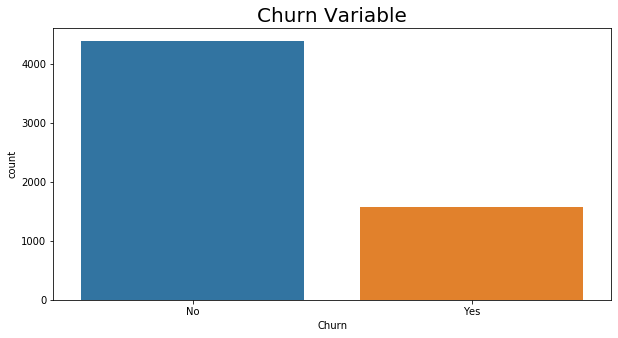

In [28]:
#For the churn variable
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(x=df.Churn)
ax[0, 1]
plt.title("Churn Variable", fontsize=20)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

## Now we want to explore the other variables with respect to the Churn variable

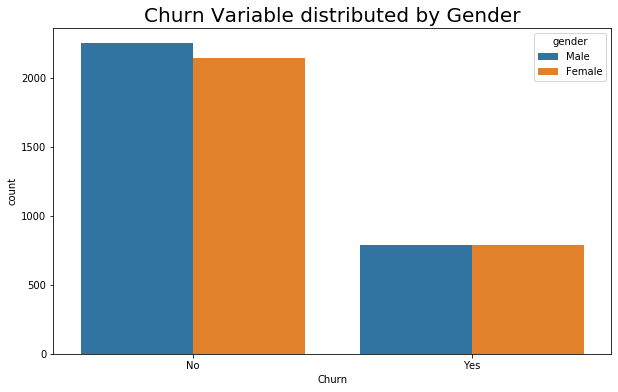

In [31]:
#gender
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'gender', data = df)
plt.title("Churn Variable distributed by Gender", fontsize=20)
plt.show()

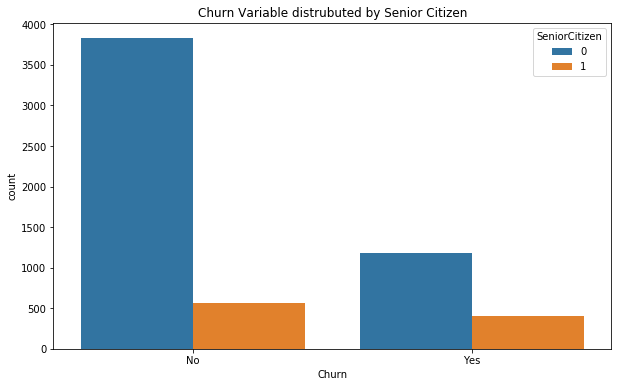

In [51]:
#seniorCitizen
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'SeniorCitizen', data = df)
plt.title("Churn Variable distrubuted by Senior Citizen")
plt.show()

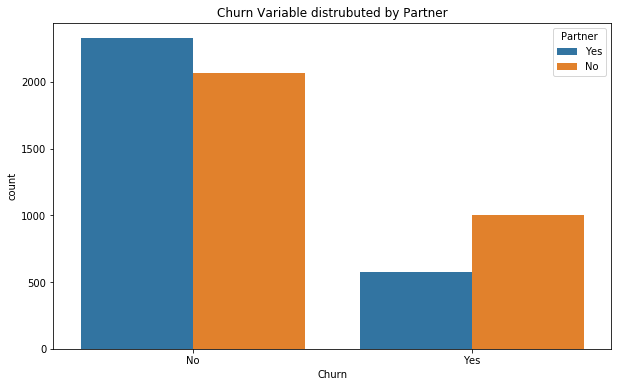

In [33]:
#partner
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'Partner', data = df)
plt.title("Churn Variable distrubuted by Partner")
plt.show()

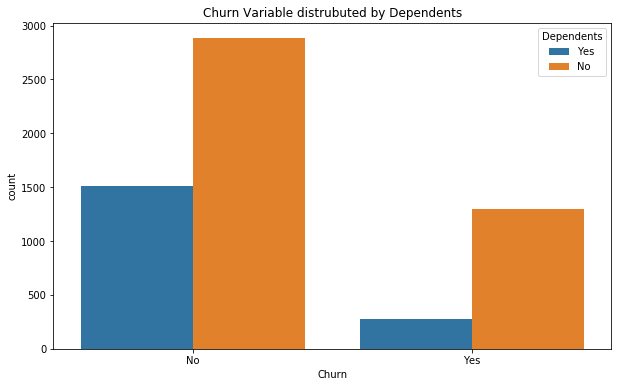

In [35]:
#dependents
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'Dependents', data = df)
plt.title("Churn Variable distrubuted by Dependents")
plt.show()

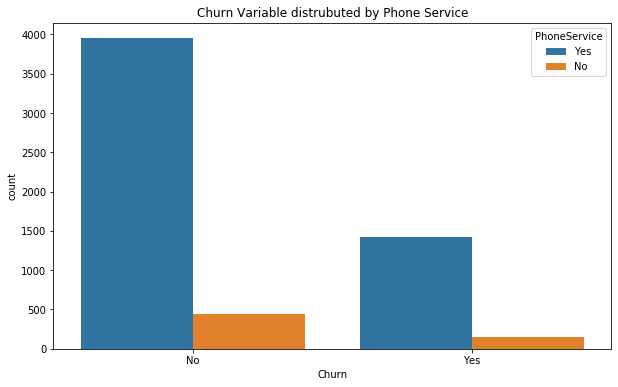

In [39]:
#tenure
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'PhoneService', data = df)
plt.title("Churn Variable distrubuted by Phone Service")
plt.show()

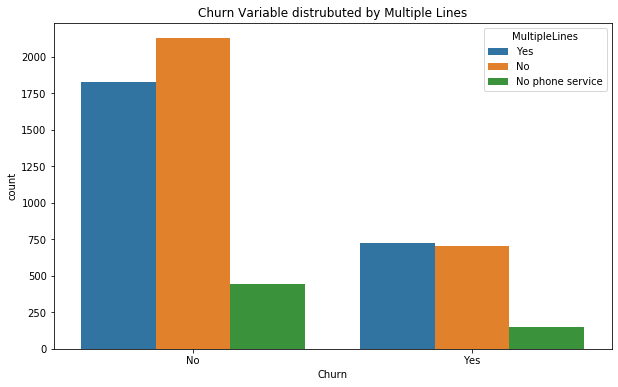

In [40]:
#multiple lines
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'MultipleLines', data = df)
plt.title("Churn Variable distrubuted by Multiple Lines")
plt.show()

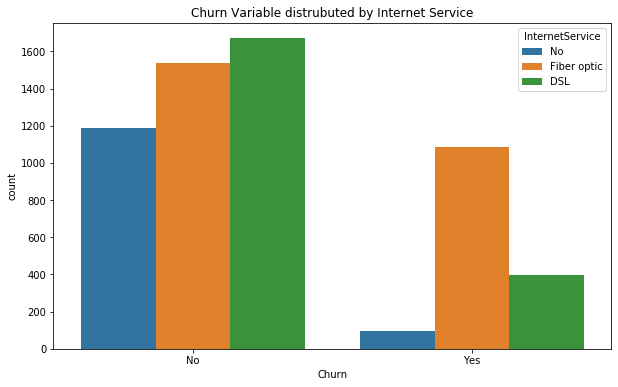

In [41]:
#internet service
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'InternetService', data = df)
plt.title("Churn Variable distrubuted by Internet Service")
plt.show()

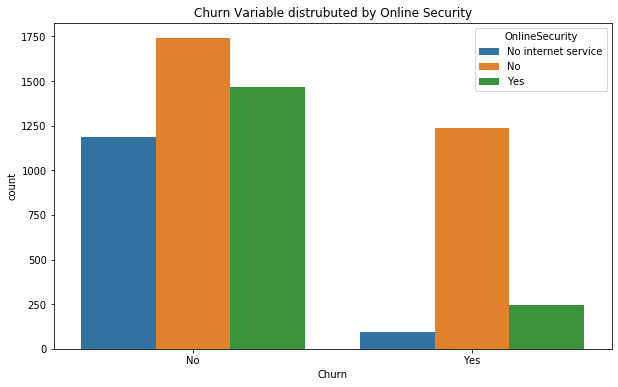

In [42]:
#online security
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'OnlineSecurity', data = df)
plt.title("Churn Variable distrubuted by Online Security")
plt.show()

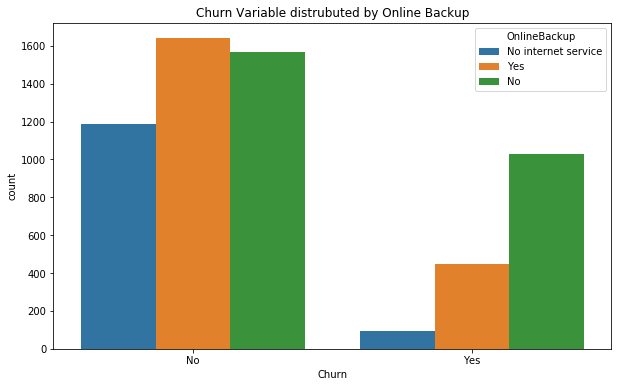

In [43]:
#online backup
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'OnlineBackup', data = df)
plt.title("Churn Variable distrubuted by Online Backup")
plt.show()

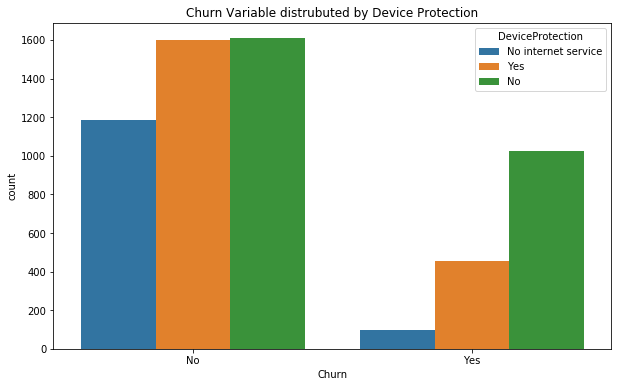

In [44]:
#device protection
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'DeviceProtection', data = df)
plt.title("Churn Variable distrubuted by Device Protection")
plt.show()

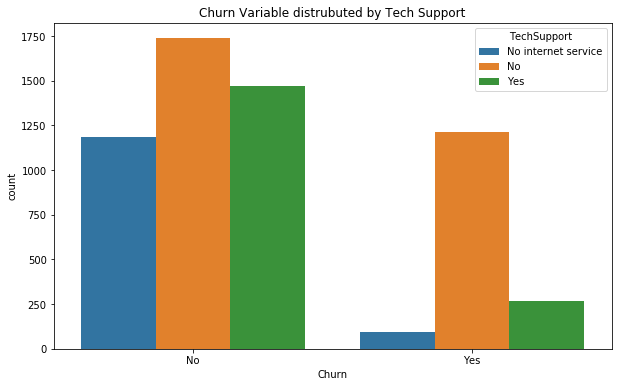

In [45]:
#tech support
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'TechSupport', data = df)
plt.title("Churn Variable distrubuted by Tech Support")
plt.show()

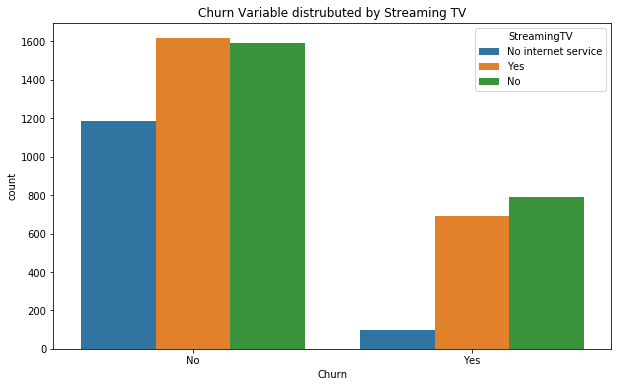

In [46]:
#streaming tv
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'StreamingTV', data = df)
plt.title("Churn Variable distrubuted by Streaming TV")
plt.show()

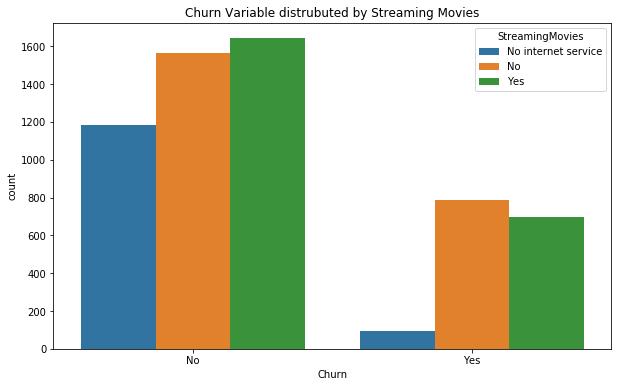

In [47]:
#streaming movies
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'StreamingMovies', data = df)
plt.title("Churn Variable distrubuted by Streaming Movies")
plt.show()

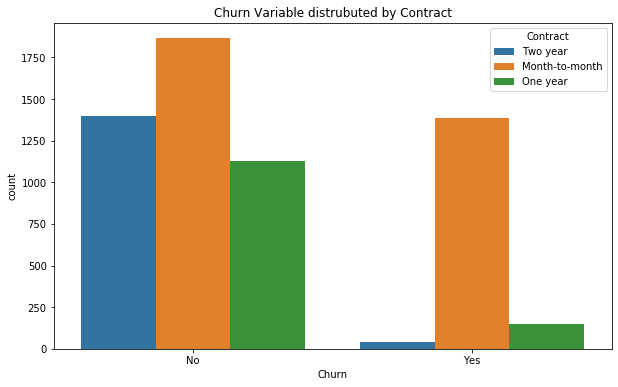

In [48]:
#contract
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'Contract', data = df)
plt.title("Churn Variable distrubuted by Contract")
plt.show()

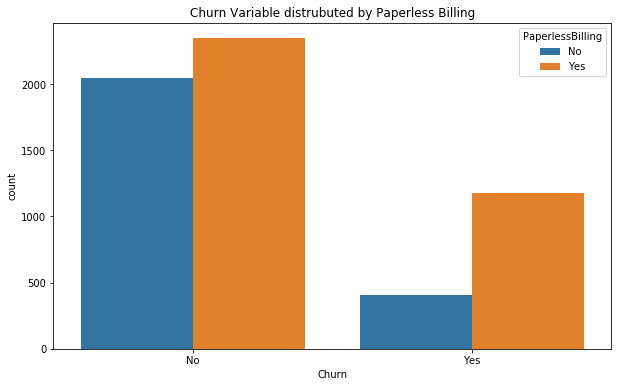

In [50]:
#paperless billing
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'PaperlessBilling', data = df)
plt.title("Churn Variable distrubuted by Paperless Billing")
plt.show()

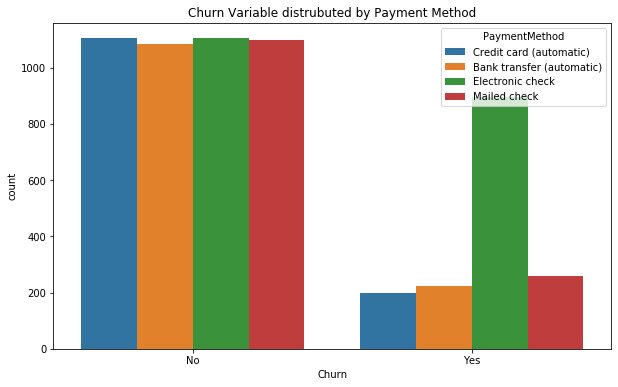

In [52]:
#payment method
plt.figure(figsize=(10,6))
sns.countplot(x = 'Churn', hue = 'PaymentMethod', data = df)
plt.title("Churn Variable distrubuted by Payment Method")
plt.show()

#### Numerical Variables

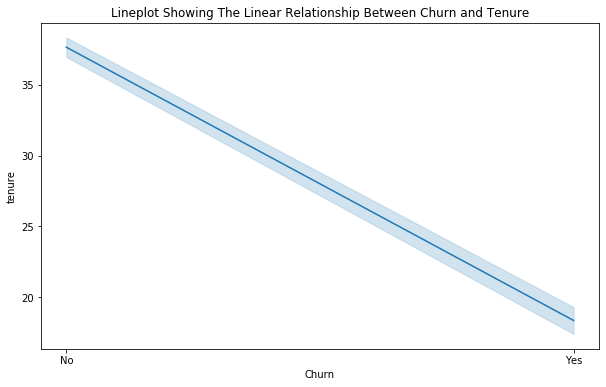

In [55]:
#tenure
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Churn', y = 'tenure', data = df)
plt.title("Lineplot Showing The Linear Relationship Between Churn and Tenure")
plt.show()

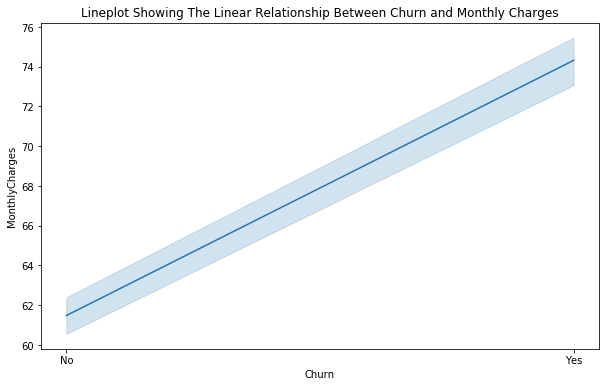

In [56]:
#monthly charges
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.title("Lineplot Showing The Linear Relationship Between Churn and Monthly Charges")
plt.show()

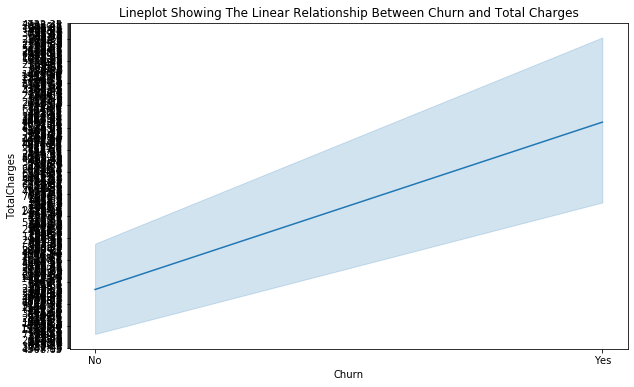

In [57]:
#total charges
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Churn', y = 'TotalCharges', data = df)
plt.title("Lineplot Showing The Linear Relationship Between Churn and Total Charges")
plt.show()

#### The Y axis is very messy because of the numbver of values, so this plot is "unusable", but was only created to see the line pattern

#### To take a better look at the numerical variables, we will use density plots and boxplots

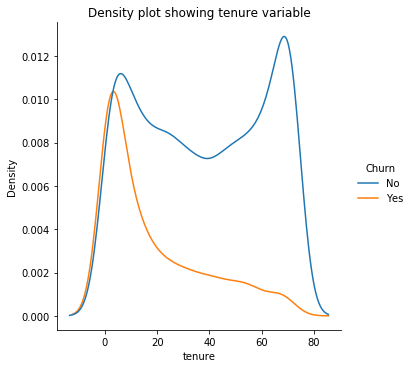

In [59]:
#tenure
sns.displot(data=df, x="tenure", hue="Churn", kind='kde')
plt.title('Density plot showing tenure variable')
plt.show()

Churn
No     37.649670
Yes    18.355739
Name: tenure, dtype: float64

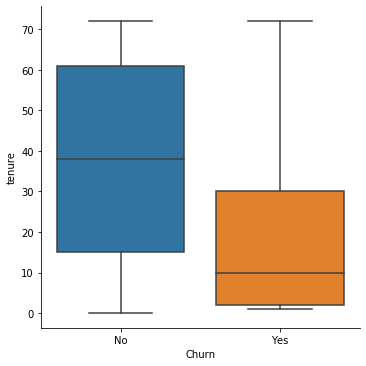

In [64]:
sns.catplot(x="Churn", y="tenure", kind="box", data=df)

df.groupby("Churn").mean()['tenure']

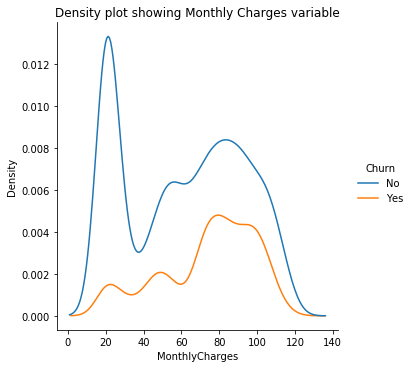

In [65]:
#monthly charges
sns.displot(data=df, x="MonthlyCharges", hue="Churn", kind='kde')
plt.title('Density plot showing Monthly Charges variable')
plt.show()

Churn
No     61.481038
Yes    74.317819
Name: MonthlyCharges, dtype: float64

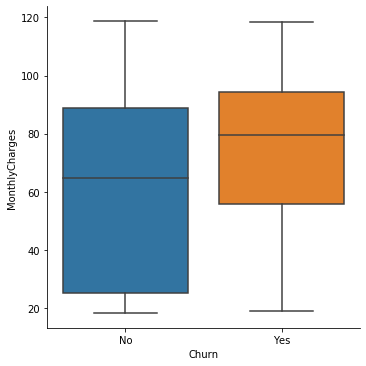

In [66]:
sns.catplot(x="Churn", y="MonthlyCharges", kind="box", data=df)

df.groupby("Churn").mean()['MonthlyCharges']

 #### It was difficult to plot the total charges because of the very wide range of numbers

### Some major observations made from the visualizations:

 ##### The higher churn rates were seen in cases where:
 - Telecom users did not have dependents
 - Telecom users had fiber-optics
 - Telecom users had no online security
 - Telecom users had no online backup
 - Telecom users had no device protection
 - Telecom users had no tech support
 - Telecom users had month-to-month contracts
 - Telecom users did not have paperless billing
 - Telecom users used the electronic check system
 - Telecom users had low tenure
 - Telecom users had high monthly charges
 - Telecom users had high total charges

#### Now for the regression models, we would first need to convert the categorical variables into dummy variables

##### Categorical variables with 2 options

In [71]:
df['gender'] = pd.factorize(df['gender'])[0]
df['Partner'] = pd.factorize(df['Partner'])[0]
df['Dependents'] = pd.factorize(df['Dependents'])[0]
df['PhoneService'] = pd.factorize(df['PhoneService'])[0]
df['PaperlessBilling'] = pd.factorize(df['PaperlessBilling'])[0]
df['Churn'] = pd.factorize(df['Churn'])[0]

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,72,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,1,0,1,1,44,0,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,1,1,0,1,38,0,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,0,0,1,1,4,0,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.5,0
4,0,0,1,1,2,0,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.5,0


##### Categorical Variables with more than 2 options

In [74]:
df = pd.get_dummies(data = df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 
                                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

In [75]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,72,0,0,24.10,1734.65,0,...,0,1,0,0,0,1,0,1,0,0
1,1,0,1,1,44,0,1,88.15,3973.2,0,...,1,0,0,1,0,0,0,1,0,0
2,1,1,0,1,38,0,1,74.95,2869.85,1,...,1,0,0,1,0,0,1,0,0,0
3,0,0,1,1,4,0,1,55.90,238.5,0,...,0,0,1,1,0,0,0,0,1,0
4,0,0,1,1,2,0,0,53.45,119.5,0,...,1,0,0,1,0,0,0,0,1,0


In [76]:
pd.DataFrame([df.mean(), df.median(), df.std(), df.var()], index = ['Mean', 'Median', 'Std. Deviation', 'Variance'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Mean,0.490787,0.161642,0.513568,0.700000,32.553099,0.098827,0.589615,64.871926,0.264154,0.474372,...,0.393467,0.214740,0.391792,0.544891,0.213735,0.241374,0.219095,0.218258,0.335176,0.227471
Median,0.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,70.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Std. Deviation,0.499957,0.368152,0.499858,0.458296,24.494958,0.298455,0.491945,30.102688,0.440919,0.499385,...,0.488560,0.410677,0.488192,0.498022,0.409976,0.427952,0.413668,0.413098,0.472091,0.419234
Variance,0.249957,0.135536,0.249858,0.210035,600.002960,0.089076,0.242010,906.171800,0.194409,0.249385,...,0.238691,0.168655,0.238331,0.248026,0.168081,0.183143,0.171121,0.170650,0.222870,0.175757


 I ran into some errors and found out that TotalCharges was a string data type, which explains some errors I had with plots

In [77]:
#converting that data tp numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast = 'float', errors='coerce')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5985
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5970 non-null   int64  
 1   SeniorCitizen                            5970 non-null   int64  
 2   Partner                                  5970 non-null   int64  
 3   Dependents                               5970 non-null   int64  
 4   tenure                                   5970 non-null   int64  
 5   PhoneService                             5970 non-null   int64  
 6   PaperlessBilling                         5970 non-null   int64  
 7   MonthlyCharges                           5970 non-null   float64
 8   TotalCharges                             5960 non-null   float32
 9   Churn                                    5970 non-null   int64  
 10  MultipleLines_No                         5970 no

In [80]:
(df.isnull().sum()*100 / len(df)).round(2).sort_values(ascending = False)

TotalCharges                               0.17
PaymentMethod_Mailed check                 0.00
MultipleLines_No                           0.00
OnlineSecurity_No internet service         0.00
OnlineSecurity_No                          0.00
InternetService_No                         0.00
InternetService_Fiber optic                0.00
InternetService_DSL                        0.00
MultipleLines_Yes                          0.00
MultipleLines_No phone service             0.00
Churn                                      0.00
OnlineBackup_No                            0.00
MonthlyCharges                             0.00
PaperlessBilling                           0.00
PhoneService                               0.00
tenure                                     0.00
Dependents                                 0.00
Partner                                    0.00
SeniorCitizen                              0.00
OnlineSecurity_Yes                         0.00
OnlineBackup_No internet service        

In [82]:
#removing null values
df_new = df.dropna(how = 'any').copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5985
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5960 non-null   int64  
 1   SeniorCitizen                            5960 non-null   int64  
 2   Partner                                  5960 non-null   int64  
 3   Dependents                               5960 non-null   int64  
 4   tenure                                   5960 non-null   int64  
 5   PhoneService                             5960 non-null   int64  
 6   PaperlessBilling                         5960 non-null   int64  
 7   MonthlyCharges                           5960 non-null   float64
 8   TotalCharges                             5960 non-null   float32
 9   Churn                                    5960 non-null   int64  
 10  MultipleLines_No                         5960 no

### Regression Prep

In [85]:
X = df_new.drop('Churn', axis = 1)
y = df_new['Churn']

In [86]:
X.shape

(5960, 40)

In [87]:
y.shape

(5960,)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

#### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

In [90]:
test_accuracy = {}

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
acc = logreg.score(X_test,y_test)*100

test_accuracy['Logistic Regression'] = acc
print("Logistic Regression Test Accuracy is: {:.2f}%".format(acc))

Logistic Regression Test Accuracy is: 80.76%


#### Naive Bayes Classifier

In [91]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

#to get the metrics
acc = nb.score(X_test,y_test)*100
test_accuracy['Naive Bayes'] = acc
print("Naive Bayes Classifier Test Accuracy is: {:.2f}%".format(acc))

Naive Bayes Classifier Test Accuracy is: 67.79%


#### KNN Classifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)  
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

knn_sc = (knn.score(X_test, y_test)*100)
print("The Accuracy of the KNN Classifier is: {:.2f}% ".format(knn_sc))

The Accuracy of the KNN Classifier is: 75.39% 


#### Optimizing K Value

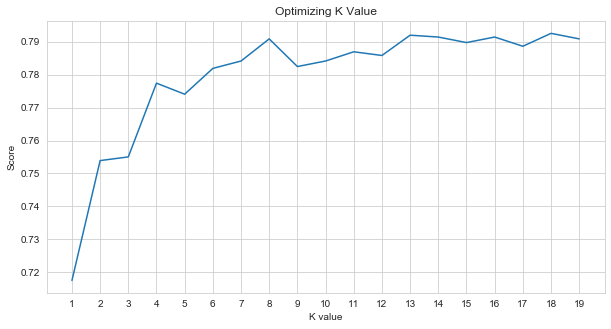

Optimal value of KNN Score is 79.25%


In [97]:
# optimizing k value
scores = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scores.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scores)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("Optimizing K Value")
plt.show()

acc = max(scores)*100
test_accuracy['KNN'] = acc
print("Optimal value of KNN Score is {:.2f}%".format(acc))

Here the elbowing can be seen at k=8, making that the optimal value of k.

#### Selecting the Model

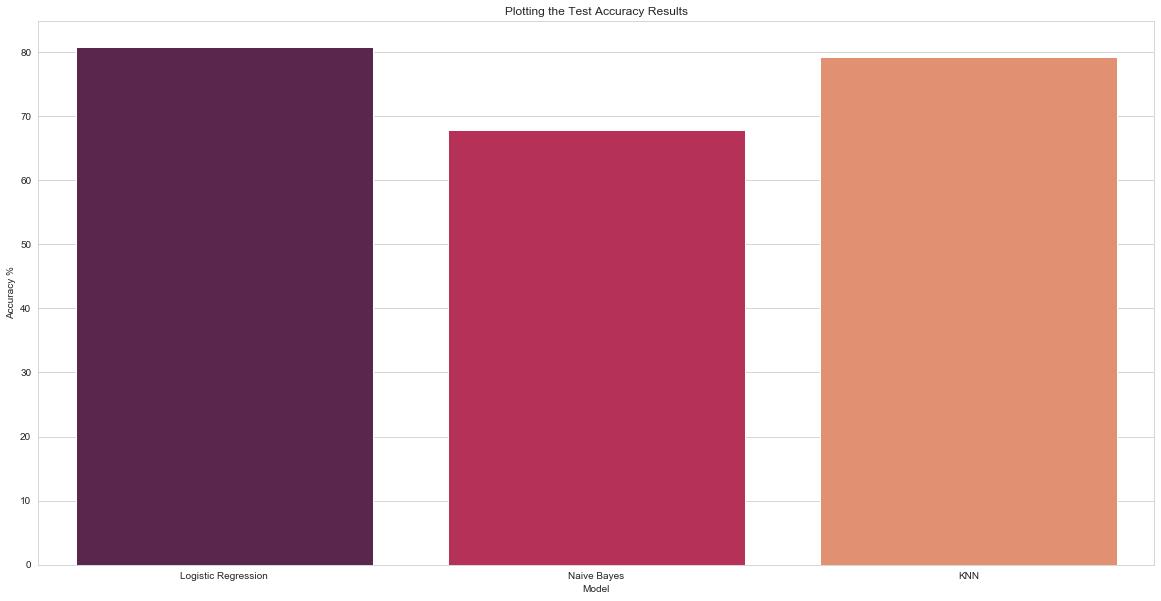

In [98]:
#plotting the test_accuracy set

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Model")
sns.barplot(x=list(test_accuracy.keys()), y=list(test_accuracy.values()), palette='rocket')
plt.title("Plotting the Test Accuracy Results")
plt.show()

##### It can be seen here that the Logistic Regression would be the best model for the data, based on the accuracy.